# Surprise Housing 

The Surprise housing is entering the Australian market and needs to know the top variables used in predicting the price of the house.

In [1]:
# Import all the packages for features selection via Ridge and lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridgef
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Data preparation and understanding 

In the below section the Data which is used is explained in details.

In [2]:
## Read the CSV file into housing dataframe and display the first five rows
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## Display the column information
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
##Display the number of rows and columns in the dataframe
housing.shape

(1460, 81)

## Missing value treatment

In [5]:
# Display the missing value percentage of all the column which is greater than 0
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)

print(null_counts[null_counts > 0])

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


### Missing values treatment of Basement fields

We will check first the number of rows with null values

In [6]:
## Missing value treatment in Basement related fields
basement_features = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1',
                     'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
print(housing[basement_features].isnull().sum())
#print(housing[basement_features].value_counts())

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinSF1       0
BsmtFinType2    38
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
BsmtFullBath     0
BsmtHalfBath     0
dtype: int64


We can see that most of the basement field which does not have values are same across all the basement columns. This means that there is no basement in those fields. Therefore we will try to handle the missing values with NA value

In [7]:
## Checking all the numberic fields where the value is equal to 0
print('BsmtFinSF1: ',(housing.BsmtFinSF1==0).sum())
print('BsmtFinSF2:',(housing.BsmtFinSF2==0).sum())
print('BsmtUnfSF:', (housing.BsmtUnfSF==0).sum())
print('BsmtFullBath:', (housing.BsmtFullBath==0).sum())
print('BsmtHalfBath:', (housing.BsmtHalfBath==0).sum())
print('TotalBsmtSF:',(housing.TotalBsmtSF==0).sum())

BsmtFinSF1:  467
BsmtFinSF2: 1293
BsmtUnfSF: 118
BsmtFullBath: 856
BsmtHalfBath: 1378
TotalBsmtSF: 37


In [8]:
# checking all the catergorical fields of basement
print(housing.BsmtQual.value_counts())
print(housing.BsmtCond.value_counts())
print(housing.BsmtFinType1.value_counts())
print(housing.BsmtFinType2.value_counts())
print(housing.BsmtExposure.value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


In [9]:
# Displying the rows where the basement condition is null
housing.loc[ (housing.BsmtCond.isnull()) ] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
342,343,90,RL,NaN,8544,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,134432


In [10]:
# Handling the null values by NA in categorical field and 0 in numberic fields
null_values = {'BsmtExposure': 'NA', 'BsmtFinType2': 'NA', 'BsmtQual': 'NA', 'BsmtCond': 'NA', 'BsmtFinType1': 'NA',
              'BsmtFinSF1': 0, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0 ,'TotalBsmtSF': 0, 'BsmtFullBath': 0, 'BsmtHalfBath': 0}
housing = housing.fillna(value=null_values)

In [11]:
# After handling missing values then check if there are any missing values in the basement columns
print(housing[basement_features].isnull().sum())

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64


We can see that all the missing values has been treated in the Basement features

In [12]:
# check for the other missing features
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)
print(null_counts[null_counts > 0])

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


### Missing values treatment in Garage features

We can see most of the garage fields are blank. We will try to handle the missing values below.

In [13]:
## display the total number of columns where the garage fields are having null values
garage_features = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
print(housing[garage_features].isnull().sum())

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64


We can see all the rows have 81 as the null values

In [14]:
# display the rows where the values are null
housing.loc[ (housing.GarageType.isnull()) ] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1350,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1407,1408,20,RL,NaN,8780,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000


In [15]:
# check how many numeric columns have value equal to 0
print('GarageCars:', (housing.GarageCars==0).sum())
print('GarageArea:',(housing.GarageArea==0).sum())

GarageCars: 81
GarageArea: 81


In [16]:
# impute the missing value with NA for categorical features and 0 for numberic features
null_values = {'GarageType':'NA','GarageYrBlt':0,'GarageFinish':'NA','GarageCars': 0,'GarageArea': 0,
               'GarageQual':'NA','GarageCond':'NA'}
housing = housing.fillna(value=null_values)

In [17]:
# check if there are any null values in the garage features
print(housing[garage_features].isnull().sum())

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64


In [18]:
# check the reamining null values
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)
print(null_counts[null_counts > 0])

LotFrontage    17.74
Alley          93.77
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
FireplaceQu    47.26
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64


In [19]:
housing.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [20]:
housing.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [21]:
housing.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [22]:
# dropping the column with more than 80% of null values as these columns have a lot of skewed data
drop_columns = ['MiscFeature','Fence','PoolQC']
housing = housing.drop(drop_columns, axis=1)
housing.shape

(1460, 78)

In [23]:
# check for the remaining null values
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)
print(null_counts[null_counts > 0])

LotFrontage    17.74
Alley          93.77
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
FireplaceQu    47.26
dtype: float64


In [24]:
# check the FireplaceQu values
housing.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [25]:
# impute the null values with NA
null_values = {'FireplaceQu':'NA' }
housing = housing.fillna(value = null_values)


In [26]:
# check the null values of other fields
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)
print(null_counts[null_counts > 0])

LotFrontage    17.74
Alley          93.77
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64


Missing value treatment of Masvnr fields

In [27]:
# checking the MasVnrType values
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [28]:
# displying the rows fof all the MasVnrType
housing.loc[ (housing.MasVnrType == 'None') ] 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,320,0,0,700,10,2009,WD,Normal,143000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,1,2008,WD,Normal,118000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [29]:
# treating the null values with None and Numeric field with 0
null_values = {'MasVnrType':'None', 'MasVnrArea': 0 }
housing = housing.fillna(value = null_values)

In [30]:
# checking the null values 
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)
print(null_counts[null_counts > 0])

LotFrontage    17.74
Alley          93.77
Electrical      0.07
dtype: float64


In [31]:
# Checking the LotFrontage values
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [32]:
# Converting the neighborhood into lower case
housing['Neighborhood'] = housing['Neighborhood'].str.lower()

In [33]:
# checking the mean values of each Neighborhood and then taking the mean of LotFrontage
housing.groupby('Neighborhood').LotFrontage.mean()

Neighborhood
blmngtn    47.142857
blueste    24.000000
brdale     21.562500
brkside    57.509804
clearcr    83.461538
collgcr    71.682540
crawfor    71.804878
edwards    68.217391
gilbert    79.877551
idotrr     62.500000
meadowv    27.800000
mitchel    70.083333
names      76.462366
noridge    91.878788
npkvill    32.285714
nridght    81.881579
nwames     81.288889
oldtown    62.788991
sawyer     74.437500
sawyerw    71.500000
somerst    64.666667
stonebr    62.700000
swisu      58.913043
timber     80.133333
veenker    59.714286
Name: LotFrontage, dtype: float64

In [34]:
# checking the null values of LotFrontage based on each Neighborhood
housing.loc[ (housing.LotFrontage.isnull()) ].Neighborhood.value_counts()

names      39
gilbert    30
nwames     28
sawyer     26
collgcr    24
clearcr    15
mitchel    13
crawfor    10
sawyerw     9
somerst     8
edwards     8
noridge     8
timber      8
brkside     7
stonebr     5
oldtown     4
veenker     4
idotrr      3
blmngtn     3
meadowv     2
npkvill     2
swisu       2
nridght     1
Name: Neighborhood, dtype: int64

### Observation:

We can see that each and every neighbourhood have some null values. So we try to fill the null values of Mean value of each and every Neighbourhood

In [35]:
# Filling the null values with the mean of each neighbourhood with the mean of each neighbourhood
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing.groupby('Neighborhood')['LotFrontage'].transform('mean'))

In [36]:
# checking the mean again 
housing.groupby('Neighborhood').LotFrontage.mean()

Neighborhood
blmngtn    47.142857
blueste    24.000000
brdale     21.562500
brkside    57.509804
clearcr    83.461538
collgcr    71.682540
crawfor    71.804878
edwards    68.217391
gilbert    79.877551
idotrr     62.500000
meadowv    27.800000
mitchel    70.083333
names      76.462366
noridge    91.878788
npkvill    32.285714
nridght    81.881579
nwames     81.288889
oldtown    62.788991
sawyer     74.437500
sawyerw    71.500000
somerst    64.666667
stonebr    62.700000
swisu      58.913043
timber     80.133333
veenker    59.714286
Name: LotFrontage, dtype: float64

In [37]:
# Checking the null values of remaining fields
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)
print(null_counts[null_counts > 0])

Alley         93.77
Electrical     0.07
dtype: float64


In [38]:
# checking the values og Electrical field
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [39]:
# Checking the null value of the Electrical field
housing.loc[ (housing.Electrical.isnull()) ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2008,WD,Normal,167500


As there is only column with null values so we replace the null value with the SBrkr as there is maximum values 

In [40]:
# Treating the null values with SBrkr as most of the rows are under the same category
housing.Electrical = housing.Electrical.fillna('SBrkr')

In [41]:
# replacing the null values in Alley with NA
print(housing['Alley'].value_counts())
housing['Alley'] = housing['Alley'].fillna(value = 'NA')
print(housing['Alley'].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64
NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64


In [42]:
# checking the Null values 
null_counts = round(100*(housing.isnull().sum()/len(housing['Id'])),2)
print(null_counts)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 78, dtype: float64


We can see that there is not null values in the Data set

Text(0.5, 1.0, 'Sales Price Distribution Plot')

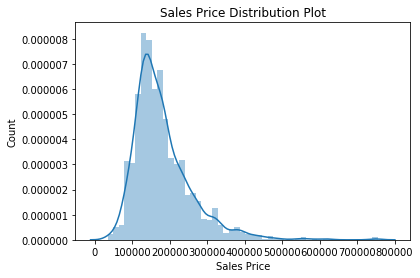

In [43]:
## Check if the target variable is normally distributed or not
fig = sns.distplot(housing.loc[housing['SalePrice'].notnull(), 'SalePrice'], kde=True)
fig.set_xlabel('Sales Price')
fig.set_ylabel('Count') 
fig.set_title('Sales Price' +  ' Distribution Plot')



Text(0.5, 1.0, 'Sales Price Distribution Plot')

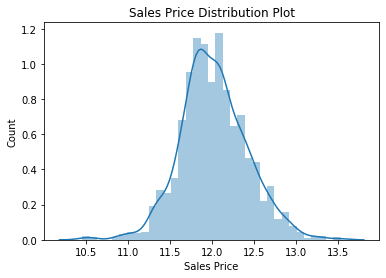

In [44]:
# Transforming the target value into log 

housing["SalePrice"] = np.log1p(housing["SalePrice"])

## Check if the target variable is normally distributed or not
fig = sns.distplot(housing.loc[housing['SalePrice'].notnull(), 'SalePrice'], kde=True)
fig.set_xlabel('Sales Price')
fig.set_ylabel('Count') 
fig.set_title('Sales Price' +  ' Distribution Plot')


We can see that the SalesPrice is normally distributed

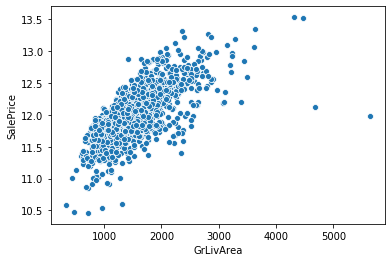

In [45]:
# check the outliers based on the GrlivArea
sns.scatterplot(x = housing['GrLivArea'], y = housing['SalePrice'])
plt.show()

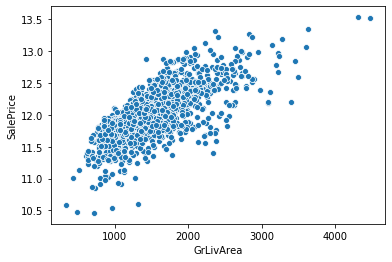

In [46]:
#Deleting outliers
housing = housing.drop(housing[(housing['GrLivArea']>4500)].index)

# Checing the plot again
sns.scatterplot(x = housing['GrLivArea'], y = housing['SalePrice'])
plt.show()

Checking the values of few categorical values which can be converted into Numeric field.
The fields like the Quality and Condition can be converted into numeric field.


In [47]:
# checking the values all the quality and condition fields
print(housing.ExterQual.value_counts())
print(housing.ExterCond.value_counts())
print(housing.BsmtQual.value_counts())
print(housing.BsmtCond.value_counts())
print(housing.HeatingQC.value_counts())
print(housing.KitchenQual.value_counts())
print(housing.FireplaceQu.value_counts())
print(housing.GarageQual.value_counts())
print(housing.GarageCond.value_counts())

TA    906
Gd    488
Ex     50
Fa     14
Name: ExterQual, dtype: int64
TA    1280
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
TA    649
Gd    618
Ex    119
NA     37
Fa     35
Name: BsmtQual, dtype: int64
TA    1309
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
Ex    739
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
TA    735
Gd    586
Ex     98
Fa     39
Name: KitchenQual, dtype: int64
NA    690
Gd    378
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
TA    1309
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
TA    1324
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [48]:
## Map all the qaulity and condition field to number 
Quality = {}
Quality['Ex'] = 5 #'Excellent'
Quality['Gd'] = 4 #'Good'
Quality['TA'] = 3 #'Average/Typical'
Quality['Fa'] = 2 #'Fair'
Quality['Po'] = 1 #'Poor'
Quality['NA'] = 0 #'NA'


In [49]:
# Change the categorical fields to numberic fields
housing.ExterQual = housing.ExterQual.map(Quality) 
housing.ExterCond = housing.ExterCond.map(Quality)
housing.BsmtQual = housing.BsmtQual.map(Quality)
housing.BsmtCond = housing.BsmtCond.map(Quality)
housing.HeatingQC = housing.HeatingQC.map(Quality)
housing.KitchenQual = housing.KitchenQual.map(Quality)
housing.FireplaceQu = housing.FireplaceQu.map(Quality)
housing.GarageQual = housing.GarageQual.map(Quality)
housing.GarageCond = housing.GarageCond.map(Quality)
    

In [50]:
## Map all the BsmtFinType1 and BsmtFinType2 field to number 
BsmtFinType = {}
BsmtFinType['GLQ'] = 6 #'Good Living Quarters'
BsmtFinType['ALQ'] = 5 #'Average Living Quarters
BsmtFinType['BLQ'] = 4 #'Below Average Living Quarters'
BsmtFinType['Rec'] = 3 #'Average Rec Room'
BsmtFinType['LwQ'] = 2 #'Low Quality'
BsmtFinType['Unf'] = 1 #'Unfinished'
BsmtFinType['NA'] = 0 #'NA'


In [51]:
# check the BsmtFinType1 and BsmtFinType2 
print(housing.BsmtFinType1.value_counts())
print(housing.BsmtFinType2.value_counts())

Unf    430
GLQ    416
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
Unf    1254
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [52]:
# mapping the values to numeric values
housing.BsmtFinType1 = housing.BsmtFinType1.map(BsmtFinType)
housing.BsmtFinType2 = housing.BsmtFinType2.map(BsmtFinType)

In [53]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,...,192,84,0,0,0,0,0,12,2008,12.429220


We can drop the ID column as this does not have any impact on the prediction the SalesPrice

In [54]:
##Droping the ID dolumn 
housing = housing.drop('Id', axis=1)
housing.shape

(1458, 77)

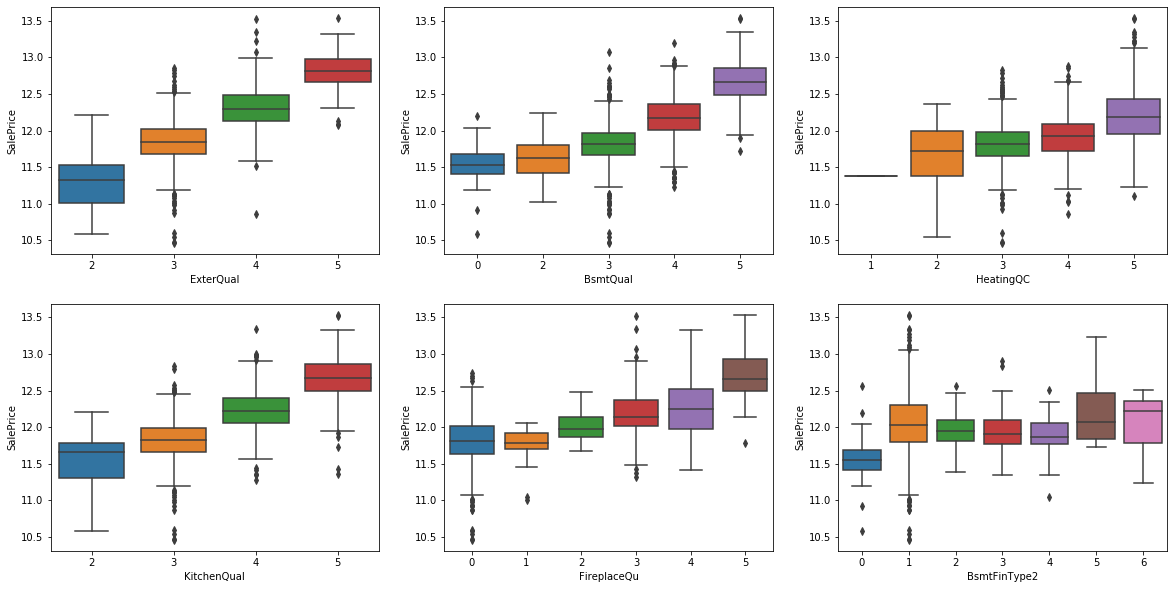

In [55]:
# checking some of the the Quality and condition fields with respective SalePrice
fig = plt.figure(figsize = (20,10))
fig1 = fig.add_subplot(231)
sns.boxplot(x='ExterQual', y='SalePrice', data=housing)

fig2 = fig.add_subplot(232)
sns.boxplot(x='BsmtQual', y='SalePrice', data=housing)

fig3 = fig.add_subplot(233)
sns.boxplot(x='HeatingQC', y='SalePrice', data=housing)

fig4 = fig.add_subplot(234)
sns.boxplot(x='KitchenQual', y='SalePrice', data=housing)

fig5 = fig.add_subplot(235)
sns.boxplot(x='FireplaceQu', y='SalePrice', data=housing)

fig6 = fig.add_subplot(236)
sns.boxplot(x='BsmtFinType2', y='SalePrice', data=housing)
plt.show()

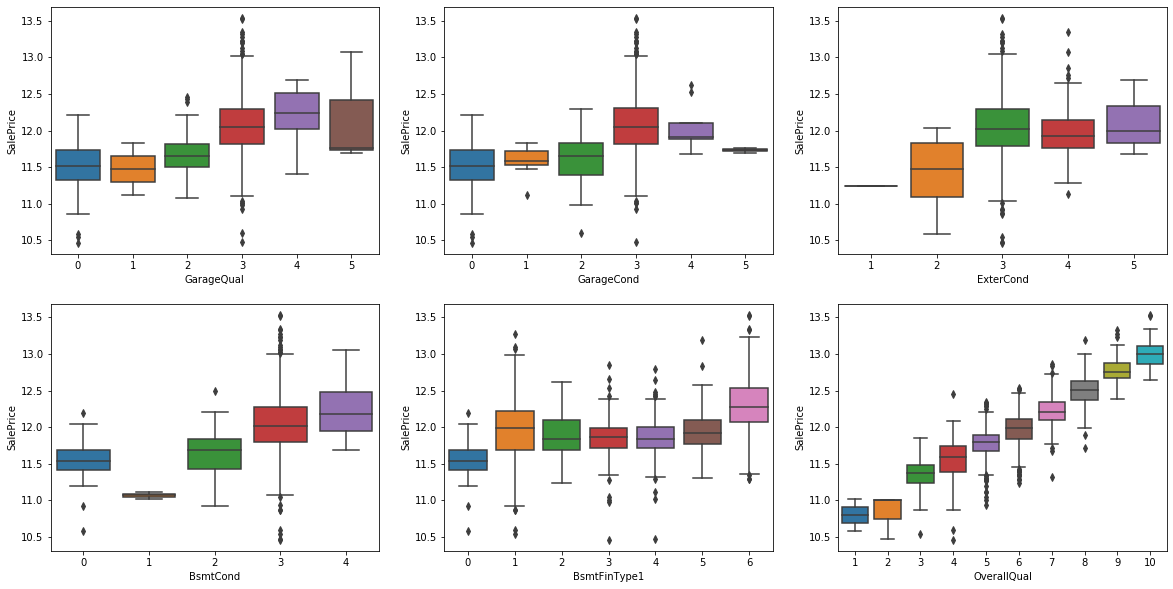

In [56]:
fig = plt.figure(figsize = (20,10))
fig1 = fig.add_subplot(231)
sns.boxplot(x='GarageQual', y='SalePrice', data=housing)

fig2 = fig.add_subplot(232)
sns.boxplot(x='GarageCond', y='SalePrice', data=housing)

fig3 = fig.add_subplot(233)
sns.boxplot(x='ExterCond', y='SalePrice', data=housing)

fig4 = fig.add_subplot(234)
sns.boxplot(x='BsmtCond', y='SalePrice', data=housing)

fig5 = fig.add_subplot(235)
sns.boxplot(x='BsmtFinType1', y='SalePrice', data=housing)

fig6 = fig.add_subplot(236)
sns.boxplot(x='OverallQual', y='SalePrice', data=housing)
plt.show()



### Observation:

We can see that the SalesPRice increases with the Overqual field.
The garageQual and garageCond mostly the values with 3 has uniform distribution

In [57]:
# Replace the age of the building by Year 
def derive_age(data):
    return data.apply(lambda x: 0 if x==0 else (2020 - x))

housing.YearBuilt = derive_age(housing.YearBuilt)
housing.YearRemodAdd = derive_age(housing.YearRemodAdd)
housing.GarageYrBlt = derive_age(housing.GarageYrBlt) 
housing.YrSold =  derive_age(housing.YrSold) 

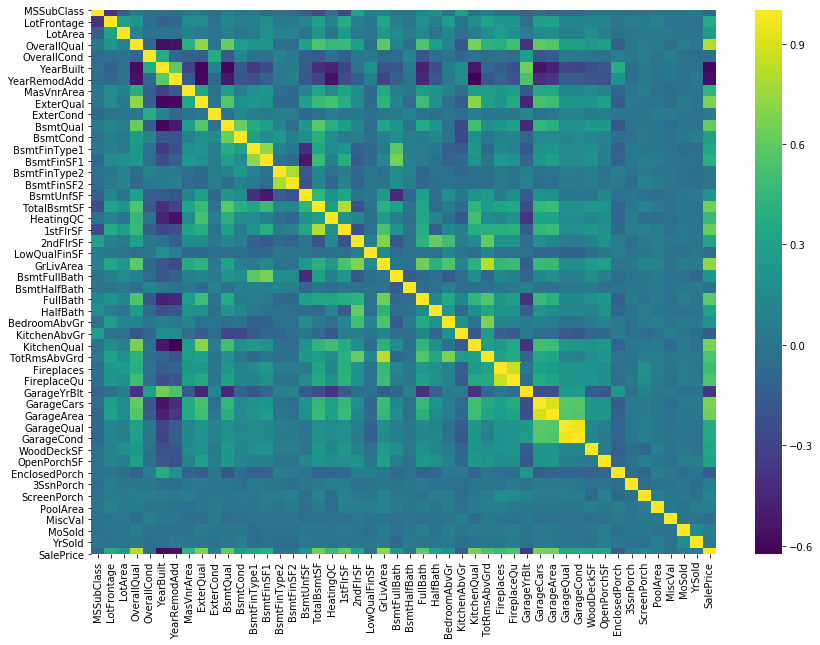

In [58]:
# Checking the correlation matrix for the all the fields
plt.figure(figsize=(14,10))
sns.heatmap(housing.corr(), cmap = 'viridis', annot = False)

### Observations:

The below columns are correlated with each other:
    - GarageCond is correralted with GarageQual
    - GarageCars is related to GarageArea
    - 1stFlrSF and 2ndFlrSF is correlated with TotalBsmtSF
    - Fireplaces is correlated with FireplaceQu
    - BsmtCond is correralted with BsmtQual
    - BsmtFinType1 is related to BsmtFinSF1
    - BsmtFinType2 is related to BsmtFinSF2
    
But we will not drop any feature which is having multicolinearity as we might loose some important features

## Skewed Data

Checking for skewed data 

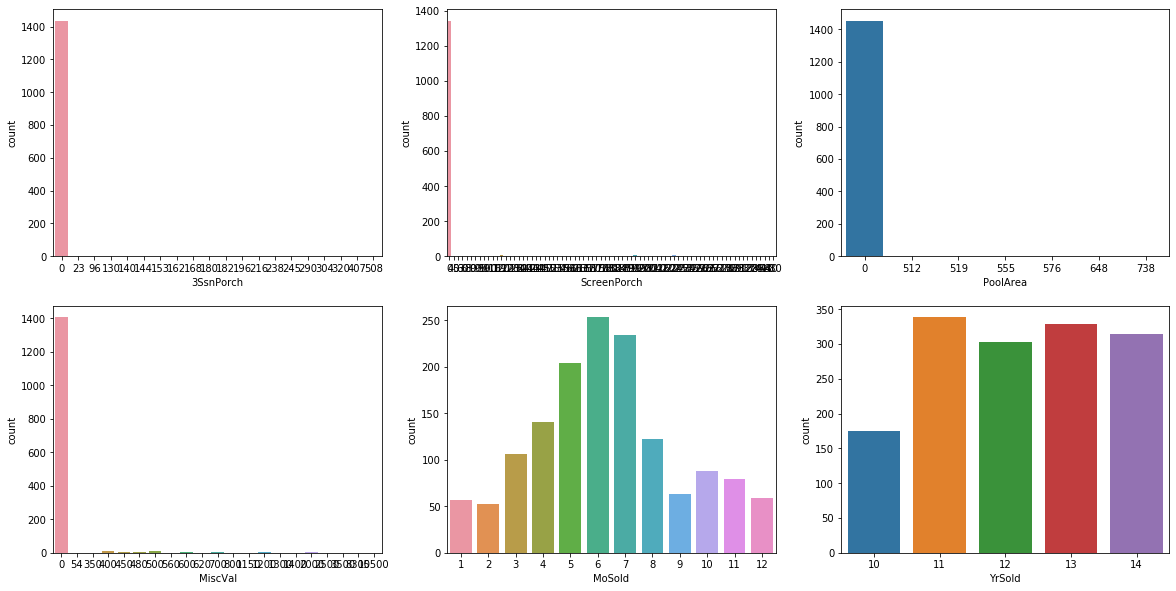

In [59]:
# Checking for skewed data for few columns
fig = plt.figure(figsize = (20,10))
fig1 = fig.add_subplot(231)
sns.countplot(housing['3SsnPorch'])


fig2 = fig.add_subplot(232)
sns.countplot(housing['ScreenPorch'])

fig3 = fig.add_subplot(233)
sns.countplot(housing['PoolArea'])

fig4 = fig.add_subplot(234)
sns.countplot(housing['MiscVal'])

fig5= fig.add_subplot(235)
sns.countplot(housing['MoSold'])

fig6= fig.add_subplot(236)
sns.countplot(housing['YrSold'])

### Observations:

We can see that below columns have skewed data, therefore we will drop these columns:
    
    1. 3SsnPorch
    2. ScreenPorch
    3. PoolArea
    4. MiscVal

In [60]:
# Dropping Skewed column 
drop_column = ['3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']
housing = housing.drop(drop_column, axis = 1)

In [61]:
# checking the shape of the dataframe
housing.shape

(1458, 73)

In [62]:
# converting the values into X and y
y = housing.pop('SalePrice')
X = housing

In [63]:
X.shape

(1458, 72)

In [64]:
# creating the subset of  all categorical variables
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,BsmtExposure,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,collgcr,Norm,...,No,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,veenker,Feedr,...,Gd,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,collgcr,Norm,...,Mn,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,crawfor,Norm,...,No,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,noridge,Norm,...,Av,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,WD,Normal


In [65]:
# Creating Dummies of all the categorical fields
housing_dummies = pd.get_dummies(housing_categorical)
print(housing_dummies.shape)

(1458, 191)


In [66]:
# drop all the categorical variables as we have created the dummies of each and every fields
X = X.drop(list(housing_categorical.columns), axis=1)

In [67]:
# concat dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [68]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [69]:
# Performing the scaling on the train and transforming the test set
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
# storing all the features 
features = X.columns

## Ridge Regression

In the below section we will perform the Ridge regression. We will use the range of alpha value from 0.0001 to 1000. We will use the GridSearch with 5 folds of cross validation to find the best alpha value for the model.

In [71]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation using GridSearch
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [72]:
# Finding the best alpha value and the best score
print(model_cv.best_params_)
print(model_cv.best_score_)

# Printing the 10 rows of the cross validations
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head(10)

{'alpha': 100}
-0.08519804938007682


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011731,0.003654,0.000921,1.468653e-04,0.0001,{'alpha': 0.0001},-0.091292,-0.076985,-0.091126,-0.080490,...,-0.087060,0.007053,26,-0.059800,-0.062785,-0.060035,-0.064462,-0.059801,-0.061377,0.001912
1,0.007504,0.000734,0.000709,7.776979e-07,0.001,{'alpha': 0.001},-0.091292,-0.076986,-0.091125,-0.080490,...,-0.087059,0.007053,25,-0.059800,-0.062785,-0.060035,-0.064462,-0.059801,-0.061377,0.001912
2,0.007056,0.000111,0.000714,5.647250e-06,0.01,{'alpha': 0.01},-0.091291,-0.076988,-0.091123,-0.080488,...,-0.087058,0.007052,24,-0.059800,-0.062785,-0.060035,-0.064462,-0.059801,-0.061377,0.001912
3,0.008384,0.001296,0.001099,4.458210e-04,0.05,{'alpha': 0.05},-0.091285,-0.076998,-0.091111,-0.080477,...,-0.087053,0.007047,23,-0.059800,-0.062786,-0.060038,-0.064463,-0.059800,-0.061378,0.001912
4,0.008582,0.001266,0.000745,3.512785e-05,0.1,{'alpha': 0.1},-0.091279,-0.077010,-0.091097,-0.080464,...,-0.087047,0.007041,22,-0.059801,-0.062788,-0.060042,-0.064464,-0.059799,-0.061379,0.001912
5,0.006879,0.000024,0.000711,6.306881e-06,0.2,{'alpha': 0.2},-0.091265,-0.077035,-0.091069,-0.080438,...,-0.087035,0.007030,21,-0.059801,-0.062791,-0.060048,-0.064465,-0.059800,-0.061381,0.001912
6,0.007030,0.000188,0.000716,9.439690e-06,0.3,{'alpha': 0.3},-0.091251,-0.077058,-0.091041,-0.080411,...,-0.087022,0.007020,20,-0.059802,-0.062794,-0.060055,-0.064467,-0.059801,-0.061384,0.001911
7,0.007464,0.000671,0.000793,1.533045e-04,0.4,{'alpha': 0.4},-0.091237,-0.077080,-0.091015,-0.080384,...,-0.087009,0.007009,19,-0.059802,-0.062797,-0.060062,-0.064468,-0.059803,-0.061387,0.001911
8,0.007538,0.001185,0.000836,2.186279e-04,0.5,{'alpha': 0.5},-0.091224,-0.077101,-0.090989,-0.080356,...,-0.086996,0.007000,18,-0.059803,-0.062801,-0.060068,-0.064470,-0.059805,-0.061389,0.001911
9,0.007363,0.000548,0.000738,3.782224e-05,0.6,{'alpha': 0.6},-0.091210,-0.077122,-0.090964,-0.080328,...,-0.086984,0.006990,17,-0.059804,-0.062804,-0.060074,-0.064471,-0.059807,-0.061392,0.001910


### Observation:

We can see that the best alpha value is 100 and the best score the same is -0.08519804938007682.
We will create a model with alpha as 100 and train the model

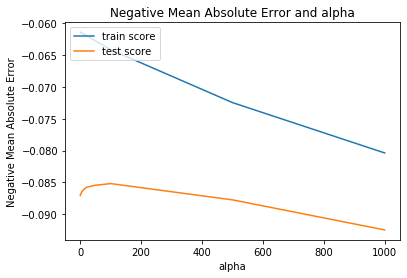

In [73]:
# plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
# Building the model with alpha as 50 and printing the coefficient
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.72187458e-03,  1.09943027e-02,  2.30232655e-02,  5.18302490e-02,
        3.37134043e-02, -2.70406512e-02, -1.70810550e-02,  3.99501765e-03,
        1.73012616e-03, -3.98006647e-03,  1.25997947e-02,  2.61793204e-03,
        1.73309019e-02,  2.68737494e-02, -8.99224547e-05,  6.95329714e-03,
        8.27853797e-03,  3.88693314e-02,  1.31137617e-02,  3.85178227e-02,
        3.28309050e-02,  8.73673624e-04,  5.79913339e-02,  8.91778052e-03,
        3.58555888e-04,  1.20628821e-02,  1.55151463e-02, -2.39862305e-03,
       -9.08982684e-03,  1.47257010e-02,  1.24579513e-02,  9.55488210e-03,
        1.26060479e-02,  1.47688799e-03,  1.55498583e-02,  2.10447978e-02,
        6.43902270e-03,  1.34293275e-03,  9.40722502e-03,  7.84321475e-03,
        7.50112590e-04, -2.12823681e-03,  3.37490378e-03, -2.84043902e-02,
        7.57455655e-03,  8.00947536e-04,  7.81974382e-03, -6.54442858e-03,
       -1.31221450e-03,  1.31221450e-03, -2.23629481e-03, -1.93613245e-03,
        5.63845163e-03, -

In [75]:
# Finding the r2 score of the train and test data
predict_train_ridge = ridge.predict(X_train)
print(r2_score(y_train,predict_train_ridge))

predict_test_ridge = ridge.predict(X_test)
print(r2_score(y_test,predict_test_ridge))

0.9491569451494787
0.9054211246299001


### Observations:

The r2 score of the train is 0.94 and that of the test is 0.90. The model is performing well on the test data

In [76]:
# Finding the best features that helps in prediction the traget varaiables
# Creating the mapping between coefficient and the features
ridge_features_coef = pd.Series(ridge.coef_, index = X.columns)
ridge_features_coef.index.name = 'Features'

ridge_features_coef = ridge_features_coef.reset_index(name='Coefficient')

# Displyaing the top 10 features where the coefficient values is less than 0
ridge_features_coef.loc[ (ridge_features_coef.Coefficient < 0 ) ].sort_values(by = 'Coefficient').head(10)

,Features,Coefficient
43,MSZoning_C (all),-0.028404
5,YearBuilt,-0.027041
6,YearRemodAdd,-0.017081
70,LandSlope_Sev,-0.016781
81,Neighborhood_meadowv,-0.015630
199,Functional_Maj2,-0.013860
96,Condition1_Artery,-0.012443
228,SaleCondition_Abnorml,-0.012382
120,HouseStyle_1Story,-0.010947
141,Exterior1st_BrkComm,-0.010710


In [77]:
# Displyaing the top 10 features where the coefficient values is less than 0
ridge_features_coef.loc[(ridge_features_coef.Coefficient > 0 )].sort_values(by='Coefficient', ascending=False).head(10)

,Features,Coefficient
22,GrLivArea,0.057991
3,OverallQual,0.051830
17,TotalBsmtSF,0.038869
19,1stFlrSF,0.038518
4,OverallCond,0.033713
20,2ndFlrSF,0.032831
13,BsmtFinSF1,0.026874
2,LotArea,0.023023
77,Neighborhood_crawfor,0.021272
35,GarageArea,0.021045


### Observations:

The coefficient values can be taken as the factore to determine the top features. The features with higher coefficient in both negative and positive will be taken into consideration.

The top 12 features which helps in predicting the traget variable are:

    1. GrLivArea
    2. OverallQual
    3. TotalBsmtSF
    4. 1stFlrSF
    5. OverallCond
    6. 2ndFlrSF
    7. MSZoning_C (all)
    8. yearBuilt
    9. BsmtFinSF1
    10. LotArea
    11. Neighborhood_crawfor
    12. GarageArea

## Lasso Regression

In the below section we will perform the Lasso regression. We will use the range of alpha value from 0.0001 to 1.0. We will use the GridSearch with 5 folds of cross validation to find the best alpha value for the model.

In [78]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [79]:
# Finding the best score and the best alpha value and print the 5 value of lasso
print(model_cv.best_params_)
print(model_cv.best_score_)

lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

{'alpha': 0.001}
-0.0828667027125135


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.129097,0.019366,0.000849,0.000130,0.0001,{'alpha': 0.0001},-0.090520,-0.077498,-0.090327,-0.079577,...,-0.086470,0.006673,3,-0.059899,-0.062890,-0.060210,-0.064499,-0.059852,-0.061470,0.001890
1,0.030586,0.002889,0.000764,0.000101,0.001,{'alpha': 0.001},-0.087998,-0.075382,-0.087148,-0.072087,...,-0.082867,0.007684,1,-0.061872,-0.064197,-0.061885,-0.065897,-0.061608,-0.063092,0.001687
2,0.009527,0.000379,0.000705,0.000025,0.01,{'alpha': 0.01},-0.089334,-0.083491,-0.083501,-0.071879,...,-0.085167,0.008424,2,-0.075765,-0.078413,-0.077493,-0.079879,-0.075838,-0.077478,0.001566
3,0.007401,0.000397,0.000704,0.000044,0.05,{'alpha': 0.05},-0.115057,-0.112648,-0.109347,-0.091025,...,-0.112820,0.014356,4,-0.110158,-0.109671,-0.111066,-0.113057,-0.109480,-0.110686,0.001306
4,0.007113,0.000367,0.000706,0.000004,0.1,{'alpha': 0.1},-0.158375,-0.143531,-0.147788,-0.122600,...,-0.149176,0.016856,5,-0.146478,-0.146472,-0.148581,-0.149232,-0.147039,-0.147560,0.001137


### Observation:

We can see that the best alpha value is 0.001 and the best score the same is -0.0828667027125135.
We will create a model with alpha as 0.001 and train the model

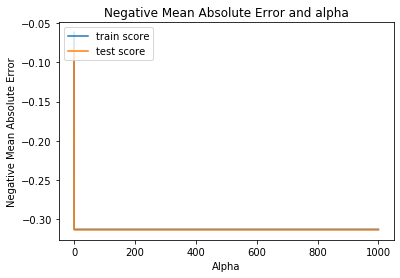

In [80]:
# plotting mean test and train scoes with alpha 
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [81]:
# Building the model with alpha as 0.001
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
## Fidn teh r2 score of both train and test data
predict_train_lasso = lasso.predict(X_train)
print(r2_score(y_train,predict_train_lasso))

predict_test_lasso = lasso.predict(X_test)
print(r2_score(y_test,predict_test_lasso))

0.9500371718396595
0.905720485817483


##### Observations:

The r2 score of the train is 0.95 and that of the test is 0.90. The model is performing well on the test data

In [83]:
## Creating the mapping with the coefficient and the features of lasso regression
lasso_features_coef = pd.Series(lasso.coef_, index = X.columns)
lasso_features_coef.index.name = 'Features'

lasso_features_coef = lasso_features_coef.reset_index(name='Coefficient')

# Displyaing the top 10 features where the coefficient values is less than 0
lasso_features_coef.loc[ (lasso_features_coef.Coefficient < 0 )  ].sort_values(by = 'Coefficient').head(10)

,Features,Coefficient
5,YearBuilt,-0.053380
43,MSZoning_C (all),-0.030086
70,LandSlope_Sev,-0.021441
228,SaleCondition_Abnorml,-0.018001
6,YearRemodAdd,-0.015044
47,MSZoning_RM,-0.014930
199,Functional_Maj2,-0.014472
96,Condition1_Artery,-0.014004
81,Neighborhood_meadowv,-0.013100
188,Heating_Grav,-0.010738


In [84]:
# Displyaing the top 10 features where the coefficient values is greater than 0
lasso_features_coef.loc[(lasso_features_coef.Coefficient > 0 )].sort_values(by = 'Coefficient', ascending = False).head(10)

,Features,Coefficient
22,GrLivArea,0.137438
3,OverallQual,0.064938
17,TotalBsmtSF,0.049506
4,OverallCond,0.040631
2,LotArea,0.028339
77,Neighborhood_crawfor,0.022921
35,GarageArea,0.020595
13,BsmtFinSF1,0.020301
12,BsmtFinType1,0.016498
86,Neighborhood_nridght,0.014695


### Observations:

The coefficient values can be taken as the factor to determine the top features. The features with higher coefficient in both negative and positive will be taken into consideration.

The top 12 features which helps in predicting the traget variable are:

    1. GrLivArea
    2. OverallQual
    3. yearBuilt
    4. TotalBsmtSF
    5. OverallCond
    6. MSZoning_C (all)
    7. LotArea
    8. Neighborhood_crawfor
    9. LandSlope_Sev
    10. GarageArea
    11. BsmtFinSF1
    12. SaleCondition_Abnorml

### Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [85]:
## Removing the top 5 features from the model and trying again
ques3_feat = ['GrLivArea','OverallQual','TotalBsmtSF','OverallCond','YearBuilt']
X = X.drop(ques3_feat, axis = 1)


In [86]:
# split into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [87]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train1) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [88]:
# Finding the best score and the best alpha value and print the 5 value of lasso
print(model_cv.best_params_)
print(model_cv.best_score_)

lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

{'alpha': 0.001}
-0.09235966305518457


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.103664,0.025648,0.001885,0.000153,0.0001,{'alpha': 0.0001},-0.096676,-0.086878,-0.096452,-0.084517,...,-0.093571,0.006928,2,-0.068563,-0.070995,-0.069167,-0.073955,-0.069440,-0.070424,0.001939
1,0.016512,0.002771,0.001797,0.000066,0.001,{'alpha': 0.001},-0.090901,-0.088982,-0.093994,-0.084526,...,-0.092360,0.006315,1,-0.080512,-0.082213,-0.081895,-0.084674,-0.079761,-0.081811,0.001689
2,0.010683,0.000352,0.001740,0.000057,0.01,{'alpha': 0.01},-0.100355,-0.104359,-0.105535,-0.106818,...,-0.106519,0.004997,3,-0.103321,-0.104033,-0.104004,-0.105184,-0.099897,-0.103288,0.001798
3,0.008116,0.000486,0.002053,0.000425,0.05,{'alpha': 0.05},-0.108624,-0.114430,-0.112729,-0.115409,...,-0.116206,0.007201,4,-0.113783,-0.114720,-0.114258,-0.114133,-0.109899,-0.113358,0.001756
4,0.008657,0.000693,0.001876,0.000105,0.1,{'alpha': 0.1},-0.112321,-0.117805,-0.116231,-0.117999,...,-0.119716,0.007535,5,-0.117508,-0.118034,-0.118084,-0.118138,-0.112621,-0.116877,0.002140


In [89]:
# Building the model with alpha as 0.001
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train1) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
## Creating the mapping with the coefficient and the features of lasso regression
lasso_features_coef1 = pd.Series(lasso.coef_, index = X.columns)
lasso_features_coef1.index.name = 'Features'

lasso_features_coef1 = lasso_features_coef1.reset_index(name='Coefficient')

# Displyaing the top 10 features where the coefficient values is less than 0
lasso_features_coef1.loc[ (lasso_features_coef1.Coefficient < 0 )  ].sort_values(by = 'Coefficient').head(10)

,Features,Coefficient
38,MSZoning_C (all),-0.251319
186,CentralAir_N,-0.073373
223,SaleCondition_Abnorml,-0.055096
76,Neighborhood_meadowv,-0.038292
115,HouseStyle_1Story,-0.031607
42,MSZoning_RM,-0.030314
73,Neighborhood_edwards,-0.028790
147,Exterior1st_Wd Sdng,-0.027189
91,Condition1_Artery,-0.025664
83,Neighborhood_oldtown,-0.023852


In [91]:
# Displyaing the top 10 features where the coefficient values is greater than 0
lasso_features_coef1.loc[(lasso_features_coef1.Coefficient > 0 )].sort_values(by = 'Coefficient', ascending = False).head(10)

,Features,Coefficient
199,Functional_Typ,0.108212
72,Neighborhood_crawfor,0.093802
87,Neighborhood_stonebr,0.059070
176,BsmtExposure_Gd,0.051844
220,SaleType_New,0.043516
5,ExterQual,0.037771
24,KitchenQual,0.036716
39,MSZoning_FV,0.035662
81,Neighborhood_nridght,0.034549
93,Condition1_Norm,0.034411


### Observation:

The best 5 features are :

    1. MSZoning_C (all)	
    2. Functional_Typ
    3. Neighborhood_crawfor
    4. CentralAir_N
    5. SaleCondition_Abnorml	
